# Farey Diagrams
I will write matplotlib scripts to draw Farey diagrams.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

## Drawing a circle

(-1.5, 1.5)

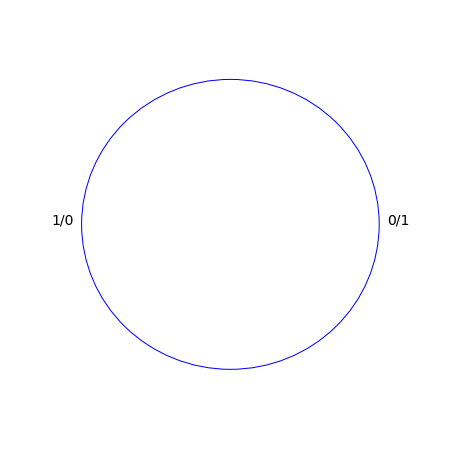

In [33]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False)

ax.add_artist(circle)

def plot_point(ax,theta,label):
    x = np.cos(theta)
    y = np.sin(theta)
    if (x > 0):
        eps = 0.05
        ax.text(x+eps*x,y+eps*y,label,size=14)
    else:
        eps = 0.20
        ax.text(x+eps*x,y+eps*y,label,size=14)
    return

plot_point(ax,0,"0/1")
plot_point(ax,np.pi,"1/0")
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

## Farey Diagram
Denote each point as (angle,numerator,denominator). Start with 0/1 and 1/0, use the mediant rule to build the diagram.

In [52]:
# (angle,num,den)
p1 = (0,0,1)
p2 = (np.pi,1,0)

points = [p1,p2]

def next_pt(p1,p2,p_arr):
    # break condition
    if p2[0] - p1[0] < np.pi/8:
        return
    else:
        num = p1[1] + p2[1]
        den = p1[2] + p2[2]
        p_next = (0.5*(p1[0] + p2[0]),num,den)
        p_arr.append(p_next)
        
        next_pt(p1,p_next,p_arr)
        next_pt(p_next,p2,p_arr)
        return


In [53]:
p_arr = [p1,p2] 
next_pt(p1,p2,p_arr)
print(p_arr)
len(p_arr)

[(0, 0, 1), (3.141592653589793, 1, 0), (1.5707963267948966, 1, 1), (0.7853981633974483, 1, 2), (0.39269908169872414, 1, 3), (0.19634954084936207, 1, 4), (0.5890486225480862, 2, 5), (1.1780972450961724, 2, 3), (0.9817477042468103, 3, 5), (1.3744467859455345, 3, 4), (2.356194490192345, 2, 1), (1.9634954084936207, 3, 2), (1.7671458676442586, 4, 3), (2.1598449493429825, 5, 3), (2.748893571891069, 3, 1), (2.552544031041707, 5, 2), (2.945243112740431, 4, 1)]


17

### Hypocycloid
The connecting arcs are given by hypocycloids

\begin{align*}
x(\theta) &= (R - r) \cos(\theta) + r\cos \frac{R -r}{r} \theta \\
y(\theta) &= (R - r) \sin(\theta) + r\sin \frac{R -r}{r} \theta \\
\end{align*}

In [47]:
def hypocycloid(R,r,theta_vec):
    '''
    Returns the (x,y co-ordinates)
    '''
    x_vec = (R-r)*np.cos(theta_vec) + r*np.cos((R-r)*theta_vec/r)
    y_vec = (R-r)*np.sin(theta_vec) - r*np.sin((R-r)*theta_vec/r)
    return x_vec,y_vec

(-1.5, 1.5)

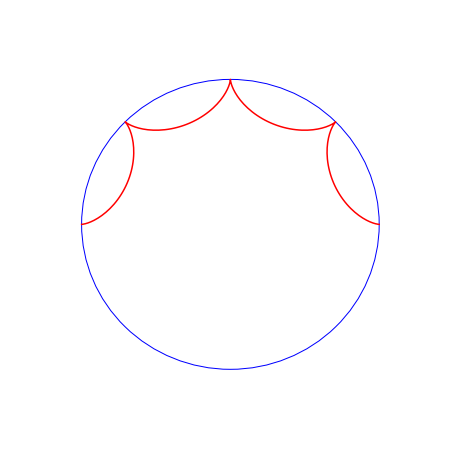

In [55]:
R = 1
r = 0.125
theta_vec = np.linspace(0,np.pi,250)
x,y = hypocycloid(R,r,theta_vec)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False)
ax.add_artist(circle)

plt.plot(x,y,'r')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

## Farey Diagram

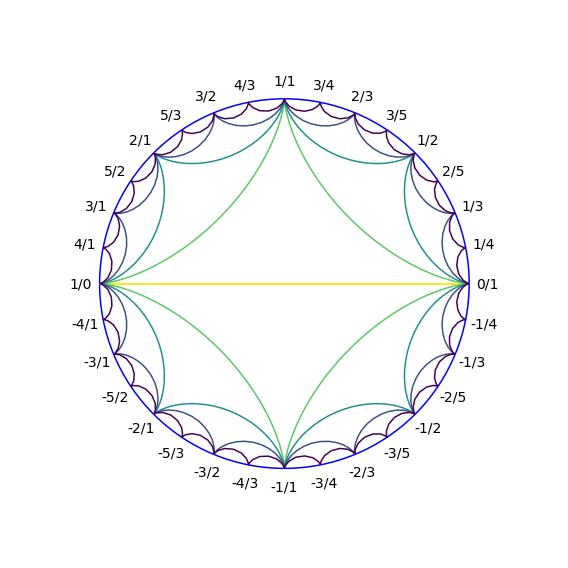

In [100]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False,linewidth=1.5)

ax.add_artist(circle)

def plot_point(ax,p):
    theta = p[0]
    
    eps = 0.1
    x = np.cos(theta)
    x_label = (1 + eps)*x
    y = np.sin(theta)
    y_label = (1 + eps)*y
    
    label = "{:d}/{:d}".format(p[1],p[2])
    text_size=14
    # center alignment ensures that the center of the text is given by the co-ordinate
    ax.text(x_label,y_label,label,horizontalalignment='center',verticalalignment='center',size=text_size)
    
    # also plot the point below x-axis
    if y > 0.01:
        label = "{:d}/{:d}".format(-p[1],p[2])
        ax.text(x_label,-y_label,label,horizontalalignment='center',verticalalignment='center',size=text_size)
    return

for p in p_arr: 
    plot_point(ax,p)

    

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

max_hypo_index = np.int(np.log2(len(p_arr)))
theta_vec = np.linspace(0,2*np.pi,250)

cmap = plt.get_cmap('viridis_r')
colors = cmap(np.linspace(0,1,max_hypo_index+1))
for i in range(1,max_hypo_index+2):
    R = 1
    r = 1/2**i
    x,y = hypocycloid(R,r,theta_vec)
    plt.plot(x,y,linewidth=1.5,color=colors[i-1])
plt.tight_layout()
plt.savefig("./saved_figs/farey.jpg",dpi=300)

## Farey Traingle 
This is a  different way to illustrate the mediant constuction from numbers between 0 and 1.


In [9]:
# p = (num,den)

def next_point(p1,p2,points):
    # break condition
    if p1[1] + p2[1] > 7:
        return
    else:
        p = (p1[0] + p2[0],p1[1] + p2[1])
        points.append(p)
        
        next_point(p1,p,points)
        next_point(p,p2,points)
    

In [11]:
p1 = (0,1)
p2 = (1,1)

points = [p1,p2]
next_point(p1,p2,points)
print(points)
len(points)

[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (2, 5), (3, 7), (2, 3), (3, 5), (4, 7), (3, 4), (5, 7), (4, 5), (5, 6), (6, 7)]


19

[(0, 1), (1, 7), (1, 6), (1, 5), (1, 4), (2, 7), (1, 3), (2, 5), (3, 7), (1, 2), (4, 7), (3, 5), (2, 3), (5, 7), (3, 4), (4, 5), (5, 6), (6, 7), (1, 1)]


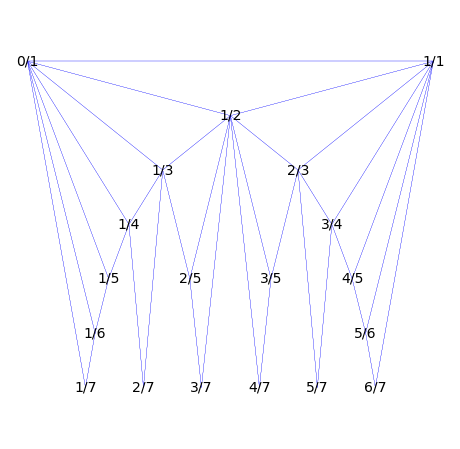

In [53]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

sorted_points = sorted(points,key= lambda x : x[0]/x[1])
print(sorted_points)
for ind,p in enumerate(sorted_points):
    x = p[0]/p[1]
    y = -p[1]/10 
    label = "{:d}/{:d}".format(p[0],p[1]) 
    ax.text(x,y,label,horizontalalignment='center',\
            verticalalignment='center',size=14,zorder=2)

ax.set_ylim([-0.8,0])

for p1 in sorted_points:
    for p2 in sorted_points:
        if abs(p1[0]*p2[1] - p1[1]*p2[0]) == 1:
            x1 = p1[0]/p1[1]
            y1 = -p1[1]/10 
            x2 = p2[0]/p2[1]
            y2 = -p2[1]/10 
            plt.plot([x1,x2],[y1,y2],color='blue',\
                     linewidth=0.2,zorder=1)
plt.savefig("./saved_figs/farey_triangle.jpg",dpi=300)

## quadrilateral property

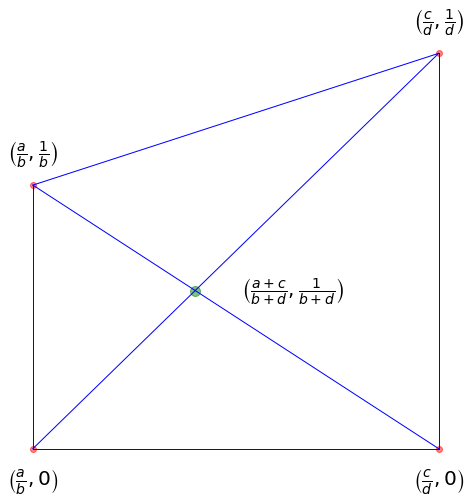

In [77]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

a=1
b=3
c=1
d=2

plt.scatter(a/b,0,color='r',alpha=0.5)
plt.scatter(c/d,0,color='r',alpha=0.5)
plt.scatter(a/b,1/b,color='r',alpha=0.5)
plt.scatter(c/d,1/d,color='r',alpha=0.5)

plt.plot([a/b,c/d],[0,0],color='b',linewidth=1)
plt.plot([a/b,c/d],[0,1/d],color='b',linewidth=1)
plt.plot([a/b,a/b],[0,1/b],color='b',linewidth=1)
plt.plot([c/d,a/b],[0,1/b],color='b',linewidth=1)
plt.plot([c/d,c/d],[0,1/d],color='b',linewidth=1)
plt.plot([a/b,c/d],[1/b,1/d],color='b',linewidth=1)

x,y = a/b,0
label=r"$\left(\frac{a}{b},0\right)$"
ax.text(x,y-0.04,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)
x,y = c/d,0
label=r"$\left(\frac{c}{d},0\right)$"
ax.text(x,y-0.04,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)
x,y = a/b,1/b
label=r"$\left(\frac{a}{b},\frac{1}{b}\right)$"
ax.text(x,y+0.04,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)
x,y = c/d,1/d
label=r"$\left(\frac{c}{d},\frac{1}{d}\right)$"
ax.text(x,y+0.04,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)

x,y = (a+c)/(b+d),1/(b+d)
label=r"$\left(\frac{a+c}{b+d},\frac{1}{b+d}\right)$"
ax.text(x+0.04,y,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)

plt.scatter((a+c)/(b+d),1/(b+d),color='g',alpha=0.5,s=100)
plt.savefig("./saved_figs/top-num-quad.svg",dpi=300)

## upper half-plane diagram

In [128]:
# p = (num,den)

def draw_semicircle(p1,p2,ax):
    center = 0.5*(p1[0]/p1[1] + p2[0]/p2[1])
    radius = 0.5*abs((p1[0]/p1[1] - p2[0]/p2[1]))
                     
    arc = mpatches.Arc((center,0),height=2*radius,width=2*radius,theta1=0,theta2=180,color='b',linewidth=1.5)
    ax.add_artist(arc)
    return

def next_point(p1,p2,points,ax):
    # break condition
    if p1[1] + p2[1] > 5:
        return
    else:
        draw_semicircle(p1,p2,ax)
        p = (p1[0] + p2[0],p1[1] + p2[1])
        points.append(p)
       
        next_point(p1,p,points,ax)
        draw_semicircle(p1,p,ax)
        next_point(p,p2,points,ax)
        draw_semicircle(p,p2,ax)


[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (2, 3), (3, 5), (3, 4), (4, 5)]


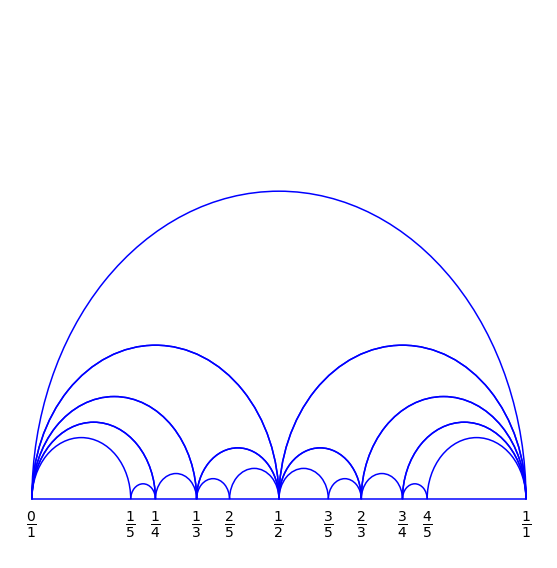

In [135]:
p1 = (0,1)
p2 = (1,1)

points = [p1,p2]

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

next_point(p1,p2,points,ax)
print(points)

ax.plot([0,1],[0,0],'b')
#ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.1,0.8])
ax.set_aspect('auto')

for p in points:
    x = p[0]/p[1]
    y = 0
    label = r"$\frac{{" + str(p[0]) + r"}}{{" + str(p[1]) + r"}}$" 
    ax.text(x,y-0.04,label,horizontalalignment='center',\
            verticalalignment='center',size=20,zorder=2)
plt.tight_layout()
plt.savefig("./saved_figs/top-num-farey-upper-half.svg",dpi=300)